In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
#initalizations
cv2.imshow("Frame0064",cv2.imread("/Users/bhuvanjama/repos/fire/ASN3_Data/Frame0064.png"))
cv2.waitKey(1)
cv2.imshow("Label0064", cv2.imread("/Users/bhuvanjama/repos/fire/ASN3_Data/Frame0064.png"))
cv2.waitKey(1)
vid_1 = cv2.VideoCapture("/Users/bhuvanjama/repos/fire/ASN3_Data/Masks.mp4")
while vid_1.isOpened():
    ret,frame = vid_1.read()
    cv2.imshow('Frame', frame)
    cv2.waitKey(1)
    
vid_1.release()
#vid_1.destroyAllWindows()
vid_1 = cv2.VideoCapture("/Users/bhuvanjama/repos/fire/ASN3_Data/Vid.mp4")
while vid_1.isOpened():
    ret,frame = vid_1.read()
    cv2.imshow('Frame', frame)
    cv2.waitKey(1)
    
vid_1.release()
#vid_1.destroyAllWindows()

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:1000: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


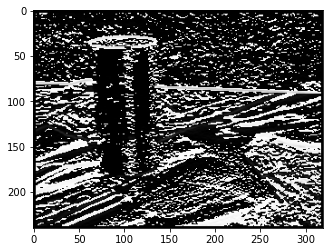

In [3]:
# Vertical edges
image = cv2.imread("/Users/bhuvanjama/repos/fire/ASN3_Data/Frame0064.png")
I_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale Pic 1", I_g)
cv2.waitKey(1)

mage = cv2.imread("/Users/bhuvanjama/repos/fire/ASN3_Data/Frame0064.png")

vertVal = [[-1,-2,-1],[0,0,0], [1,2,1]]
horizontalVal = [[-1,0,1], [-2,0,2], [-1,0,1]]
n,m,d = image.shape

vertEdges = np.zeros_like(image)
for row in range (3, n - 2):
    for col in range (3, m - 2):
        pixLocal = image[row-1:row+ 2, col-1:col+2,0]
        pixTransform = vertVal * pixLocal
        vertScore = (pixTransform.sum() + 4) /8
        vertEdges[row,col] = [vertScore] * 3
        
plt.imshow(vertEdges)

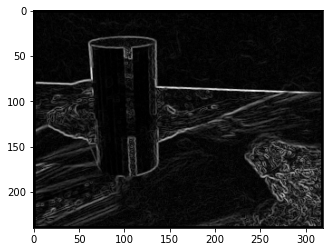

In [4]:
#Horizontal edges
imgEdges = np.zeros_like(image)

for row in range(3, n -2):
    for col in range(3, m-2):
        pixLocal = image[row-1:row+2, col-1:col+2, 0]
        vertical_transformed_pixels = vertVal * pixLocal
        vertScore = vertical_transformed_pixels.sum()/4
        
        horizontalTransPixels = horizontalVal * pixLocal
        horizontalScore = horizontalTransPixels.sum() /4
        
        edge_score = (vertScore ** 2+ horizontalScore **2) **.5
        imgEdges[row,col] = [edge_score] * 3

imgEdges = imgEdges/imgEdges.max()
plt.imshow(imgEdges)

In [5]:
kernely = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernelx = np.array( [[1,1,1],[0,0,0],[-1,-1,-1]])
edges_x = cv2.filter2D(I_g,cv2.CV_8U,kernelx)
edges_y = cv2.filter2D(I_g,cv2.CV_8U,kernely)

cv2.imshow('Gradients_X',edges_x)
cv2.imshow('Gradients_Y',edges_y)
cv2.waitKey(1)

Gx = cv2.filter2D(I_g,-1,kernelx)
cv2.imshow("Magnitude for X_fina_finall", Gx)
cv2.waitKey(2)

Gy = cv2.filter2D(I_g,-1,kernely)
cv2.imshow("Magnitude for Y_final_final", Gy)
cv2.waitKey(3)

gradient_X_Y = np.sqrt(np.add(np.square(kernelx), np.square(kernely)))
G_X_Y = cv2.filter2D(I_g, -1, gradient_X_Y)
cv2.imshow("Magnitude for Total_final_final: ", G_X_Y)
cv2.waitKey(4)

-1

Step 3

In [6]:
imageRGB = cv2.imread("/Users/bhuvanjama/repos/fire/ASN3_Data/Frame0064.png")
cv2.imshow("RGB", imageRGB)
blue, green, red = cv2.split(imageRGB)
cv2.imshow("blue", blue)
cv2.imshow("red", red)
cv2.imshow("green", green)
cv2.waitKey(1)

imageHSV = cv2.cvtColor(imageRGB, cv2.COLOR_RGB2HSV)
cv2.imshow("HSV", imageHSV)

Step 4

In [7]:
cap = cv2.VideoCapture("/Users/bhuvanjama/repos/fire/ASN3_Data/Vid.mp4")

while(1):

    _, frame = cap.read()

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    orangeMin = np.array([5, 50, 50],np.uint8)
    orangeMax = np.array([15, 255, 255],np.uint8)

    mask = cv2.inRange(hsv, orangeMin, orangeMax)

    cv2.imshow('Color edge detection',mask)

    cv2.waitKey(1)

cv2.destroyAllWindows()

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# Improved Color Detection

cap1 = cv2.VideoCapture('/Users/bhuvanjama/repos/fire/ASN3_Data/Vid.mp4')

while(1):

    _, frame = cap1.read()

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HLS)

    orangeMin = np.array([5, 50, 50],np.uint8)
    orangeMax = np.array([15, 255, 255],np.uint8)

    mask = cv2.inRange(hsv, orangeMin, orangeMax)

    cv2.imshow('Improved Color edge detection',mask)

    cv2.waitKey(1)

cv2.destroyAllWindows()

In [ ]:
# Gaussian Color Detection

cap = cv2.VideoCapture('/Users/bhuvanjama/repos/fire/ASN3_Data/Vid.mp4')
frameIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size = 25)
frames = []
for fid in frameIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES,fid)
    ret,frame = cap.read()
    frames.append(frame)
medianFrame = np.median(frames,axis = 0).astype(dtype = np.uint8)
cv2.imshow('Frame', medianFrame)
cv2.waitKey(1)


cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
grayMedFrame = cv2.cvtColor(medianFrame,cv2.COLOR_BGR2GRAY)
while (1):
    ret,frame = cap.read()
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    dframe = cv2.absdiff(frame, grayMedFrame)
    th,dframe = cv2.threshold(dframe,30,255,cv2.THRESH_BINARY)
    cv2.imshow('Frame', dframe)
    cv2.waitKey(1)
cap.release()